In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import power_transform, MinMaxScaler, StandardScaler
from imblearn import under_sampling, over_sampling
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def get_file_using_PublicURL(public_url):
  file_id_url = public_url.split('/')[-2]
  return 'https://drive.google.com/uc?id=' + file_id_url
data = get_file_using_PublicURL('https://drive.google.com/file/d/1S3Prb6z5hb-xKvaIVq4-MbT-HsfNo1cT/view?usp=sharing')

In [ ]:
df = pd.read_csv(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [ ]:
df = df.rename(columns={'PAY_0':'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


# **Data Cleansing**

### **Handling Missing Data**

In [ ]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

Data tidak memiliki missing value

### **Handling Duplicated Data**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(subset = 'ID').sum()

0

Data tidak ada yang duplicate

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
cats = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'default_payment_next_month']
df[cats].astype(str)

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default_payment_next_month
0,2,2,2,-1,-1,-1,-1,-1,-1,0
1,2,1,2,2,2,-2,-1,0,-1,0
2,2,2,1,0,0,0,0,0,0,0
3,2,2,2,-1,-1,-2,-2,-2,-2,1
4,1,3,1,-1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
20995,2,2,2,1,-2,-2,-2,-2,-2,0
20996,2,2,1,0,0,0,0,0,0,0
20997,1,1,1,1,2,2,2,0,0,1
20998,2,2,1,0,0,0,0,0,0,0


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,...,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,...,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,...,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,...,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,...,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,...,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


## **Feature Extraction**
**Creating new features**
1.   **AGE_group**
2.   **Membership**
3.   **Minimum amount setiap periode**
4.   **Pending amount setiap periode**

In [ ]:
def feature_engineering(df_tmp):
  df_tmp['kelompok_usia'] = np.where(df_tmp.AGE < 25, 'Muda', np.where(df_tmp.AGE < 50, 'Dewasa', np.where(df_tmp.AGE < 60, 'Pensiun', 'Lansia' ) ) )
  df_tmp['membership_group'] = np.where(df_tmp.LIMIT_BAL < df_tmp.LIMIT_BAL.quantile(.5), 'Silver', np.where(df_tmp.LIMIT_BAL < df_tmp.LIMIT_BAL.quantile(.75), 'Gold', 'Platinum' ) )
  df_tmp['PENDING_AMT6']= df_tmp['BILL_AMT6'] - df_tmp['PAY_AMT5']
  df_tmp['PENDING_AMT5'] = (df_tmp['BILL_AMT6'] + df_tmp['BILL_AMT5']) - (df_tmp['PAY_AMT5']+df_tmp['PAY_AMT4'])
  df_tmp['PENDING_AMT4'] = (df_tmp['BILL_AMT4'] + df_tmp['BILL_AMT5'] + df_tmp['BILL_AMT6']) - (df_tmp['PAY_AMT3'] + df_tmp['PAY_AMT4'] + df_tmp['PAY_AMT5'])
  df_tmp['PENDING_AMT3'] = (df_tmp['BILL_AMT3'] + df_tmp['BILL_AMT4'] + df_tmp['BILL_AMT5'] + df_tmp['BILL_AMT6']) - (df_tmp['PAY_AMT2']+ df_tmp['PAY_AMT3']+ df_tmp['PAY_AMT4']+ df_tmp['PAY_AMT5'])
  df_tmp['PENDING_AMT2'] = (df_tmp['BILL_AMT2'] + df_tmp['BILL_AMT3'] + df_tmp['BILL_AMT4'] + df_tmp['BILL_AMT5'] + df_tmp['BILL_AMT6']) - (df_tmp['PAY_AMT1'] + df_tmp['PAY_AMT2'] + df_tmp['PAY_AMT3'] + df_tmp['PAY_AMT4'] + df_tmp['PAY_AMT5'])
feature_engineering(df)

### Age Group

In [ ]:
df['kelompok_usia'].value_counts()

Dewasa     17275
Muda        1874
Pensiun     1612
Lansia       239
Name: kelompok_usia, dtype: int64

Customer di dominasi dengan kategori dewasa (26-59 tahun)

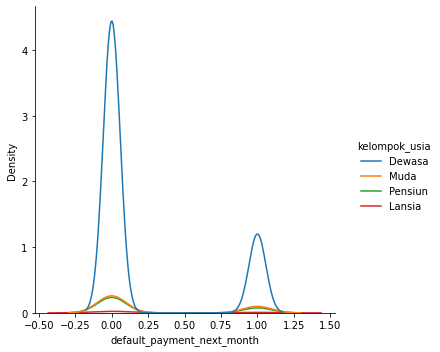

In [ ]:
sns.displot(data=df, x='default_payment_next_month', kind='kde', hue='kelompok_usia')

In [ ]:
df.groupby(['kelompok_usia']).agg(default_rate=('default_payment_next_month','mean')).reset_index().sort_values('default_rate',ascending = False)

,kelompok_usia,default_rate
2,Muda,0.275880
1,Lansia,0.251046
3,Pensiun,0.243797
0,Dewasa,0.212735


### Membership

In [ ]:
df['membership_group'].value_counts()

Silver      10194
Gold         5428
Platinum     5378
Name: membership_group, dtype: int64

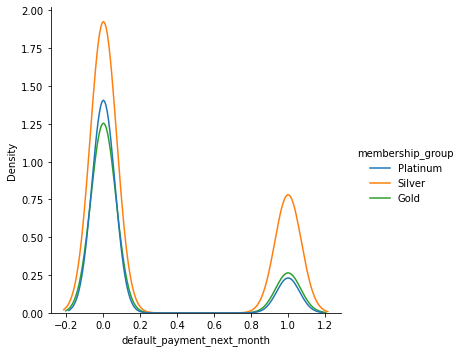

In [ ]:
sns.displot(data=df, x='default_payment_next_month', kind='kde', hue='membership_group')

In [ ]:
df.groupby(['membership_group']).agg(default_rate=('default_payment_next_month','mean')).reset_index().sort_values('default_rate',ascending = False)

,membership_group,default_rate
2,Silver,0.288601
0,Gold,0.174097
1,Platinum,0.140945


## **Feature encoding**

In [ ]:
def feature_encoding(df_tmp):
  mapping_age = {'Muda' : 0, 'Dewasa' : 1, 'Pensiun' : 2, 'Lansia' : 3}
  mapping_membership = {'Silver' : 0, 'Gold' : 1, 'Platinum' : 2}
  df_tmp['kelompok_usia'] = df_tmp['kelompok_usia'].map(mapping_age)
  df_tmp['membership_group'] = df_tmp['membership_group'].map(mapping_membership)
feature_encoding(df)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'kelompok_usia', 'membership_group',
       'PENDING_AMT6', 'PENDING_AMT5', 'PENDING_AMT4', 'PENDING_AMT3',
       'PENDING_AMT2'],
      dtype='object')

### **Splitting Data**

In [ ]:
x_columns = [col_name for col_name in df.columns if col_name not in ['default_payment_next_month','ID']]
x = df[x_columns]
y = df[['default_payment_next_month']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
xtrain.shape, xtest.shape

((14700, 30), (6300, 30))

In [ ]:
ytest.value_counts(normalize=True)

default_payment_next_month
0                             0.776508
1                             0.223492
dtype: float64

In [ ]:
ytrain.value_counts(normalize=True)

default_payment_next_month
0                             0.779796
1                             0.220204
dtype: float64

In [ ]:
def plot_me(df, all_columns, figsize=(30, 15)):
  plt.figure(figsize=figsize)
  for col_name, index in zip(all_columns, range(len(all_columns))):
      plt.subplot( math.ceil(len(all_columns)/6)  , 6, index+1)
      sns.kdeplot(x=df[col_name], color='green', linewidth=3, fill=True)
      plt.xlabel(col_name)
  plt.show()

def get_minmax_scaler(df, columns):
  scaler = {}
  for col in columns:
    scaler[col] = MinMaxScaler().fit( np.array(df[col]).reshape(-1,1) )
  return scaler

def get_standard_scaler(df, columns):
  scaler = {}
  for col in columns:
    scaler[col] = StandardScaler().fit( np.array(df[col]).reshape(-1,1) )
  return scaler

def apply_transform(scaler, df):
  temp_df = df.copy()
  for col in scaler.keys():
    temp_df[col] = scaler[col].transform( np.array(df[col]).reshape(-1,1) )
  return temp_df

In [ ]:
def eval_classification(model, xtrain, ytrain, xtest, ytest, threshold=0.5):
    ypred_proba_test = model.predict_proba(xtest)
    ypred_proba_train = model.predict_proba(xtrain)
    ypred_datatest = np.where(ypred_proba_test[:,1]>=threshold, 1, 0 )
    ypred_datatrain = np.where(ypred_proba_train[:,1]>=threshold, 1, 0 )
    
    cm = confusion_matrix(ytest, ypred_datatest)
    tn, fp, fn, tp = cm.ravel()

    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred_datatest))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred_datatest))
    # print("Precision (Train Set): %.2f" % precision_score(ytrain, ypred_datatrain))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred_datatest))
    # print("Recall (Train Set): %.2f" % recall_score(ytrain, ypred_datatrain))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred_datatest))
    # print("F1-Score (Train Set): %.2f" % f1_score(ytrain, ypred))
    print("AUC (test-proba): %.2f" % roc_auc_score(ytest, ypred_proba_test[:,1] ))
    print("AUC (train-proba): %.2f" % roc_auc_score(ytrain, ypred_proba_train[:,1] ))
    print('tp : {}\nfp  : {}\nfn  : {}\ntn  : {}\n'.format(tp, fp, fn, tn))

def eval_simulated_data(model, xtest, ytest, threshold=0.5):
    ypred_proba_datatest = model.predict_proba(xtest)
    ypred_datatest = np.where(ypred_proba_datatest[:,1]>=threshold, 1, 0 )
    cm = confusion_matrix(ytest, ypred_datatest)
    tn, fp, fn, tp = cm.ravel()
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred_datatest))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred_datatest))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred_datatest))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred_datatest))
    print("AUC (test-proba): %.2f" % roc_auc_score(ytest, ypred_proba_datatest[:,1]))
    print('\ntp : {}\nfp  : {}\nfn  : {}\ntn  : {}'.format(tp, fp, fn, tn))

# **DECISION TREE**

**Skenario 1 - Tanpa Pre-processing**

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(xtrain, ytrain)
eval_classification(dt_model, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.72
Precision (Test Set): 0.38
Recall (Test Set): 0.42
F1-Score (Test Set): 0.40
AUC (test-proba): 0.61
AUC (train-proba): 1.00
tp : 594
fp  : 972
fn  : 814
tn  : 3920



**Skenario 2 - Handling Imbalance pada Data Training dengan SMOTE**

In [ ]:
X_train_balance, y_train_balance = xtrain.copy(), ytrain.copy()
X_train_balance, y_train_balance  = over_sampling.SMOTE(sampling_strategy=1.0).fit_resample(X_train_balance, y_train_balance)

dt_model.fit(X_train_balance, y_train_balance )
eval_classification(dt_model, X_train_balance, y_train_balance, xtest, ytest)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.34
Recall (Test Set): 0.46
F1-Score (Test Set): 0.39
AUC (test-proba): 0.60
AUC (train-proba): 1.00
tp : 650
fp  : 1245
fn  : 758
tn  : 3647



### **Hyper-Parameter Tuning**
#### **Adjusted Variables**

In [ ]:
max_depth = [int(x) for x in np.linspace(1, 121, num = 30)]
min_samples_split = [int(x) for x in np.linspace(5, 121, num = 40)]
min_samples_leaf = [int(x) for x in np.linspace(1, 121, num = 40)]
max_features = ['auto', 'sqrt'] 
hyperparameters = dict(max_depth = max_depth, 
                       min_samples_split = min_samples_split, 
                       min_samples_leaf = min_samples_leaf,
                       max_features = max_features
                      )
scoring = 'roc_auc'
# dt_model_GS = GridSearchCV(dt_model, hyperparameters, cv=5, scoring=scoring, n_jobs=-1) 
dt_model_RS = RandomizedSearchCV(dt_model, hyperparameters, cv=5, scoring=scoring , n_jobs=-1, random_state=111) 

**Imbalance Data**

In [ ]:
model = dt_model_RS.fit(xtrain, ytrain)
eval_classification(model, xtrain, ytrain, xtest, ytest)
model.best_estimator_.get_params()

Accuracy (Test Set): 0.80
Precision (Test Set): 0.60
Recall (Test Set): 0.37
F1-Score (Test Set): 0.46
AUC (test-proba): 0.75
AUC (train-proba): 0.79
tp : 520
fp  : 345
fn  : 888
tn  : 4547



{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 34,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 121,
 'min_samples_split': 94,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
feature_importances_dt = pd.Series(model.best_estimator_.feature_importances_ , index=xtrain.columns)
feature_importances_dt

LIMIT_BAL           0.015776
SEX                 0.000000
EDUCATION           0.000000
MARRIAGE            0.000000
AGE                 0.000964
PAY_1               0.405115
PAY_2               0.036829
PAY_3               0.255219
PAY_4               0.034696
PAY_5               0.026016
PAY_6               0.018618
BILL_AMT1           0.009310
BILL_AMT2           0.015460
BILL_AMT3           0.007327
BILL_AMT4           0.001380
BILL_AMT5           0.005429
BILL_AMT6           0.005372
PAY_AMT1            0.026872
PAY_AMT2            0.002015
PAY_AMT3            0.068172
PAY_AMT4            0.007709
PAY_AMT5            0.002447
PAY_AMT6            0.002308
kelompok_usia       0.000424
membership_group    0.040680
PENDING_AMT6        0.001546
PENDING_AMT5        0.002177
PENDING_AMT4        0.002648
PENDING_AMT3        0.003412
PENDING_AMT2        0.002077
dtype: float64

**Balance Data**

In [ ]:
model = dt_model_RS.fit(X_train_balance, y_train_balance)
eval_classification(model, X_train_balance, y_train_balance, xtest, ytest)
model.best_estimator_.get_params()

Accuracy (Test Set): 0.71
Precision (Test Set): 0.40
Recall (Test Set): 0.57
F1-Score (Test Set): 0.47
AUC (test-proba): 0.71
AUC (train-proba): 0.89
tp : 798
fp  : 1209
fn  : 610
tn  : 3683



{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 19,
 'min_samples_split': 82,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

# **kNN**

In [ ]:
X_train_std, X_test = xtrain.copy(), xtest.copy()
X_scaler_std = get_standard_scaler(X_train_std, X_train_std.columns)
X_train_std, X_test_std = apply_transform(X_scaler_std, X_train_std), apply_transform(X_scaler_std, X_test)

X_train_bal_std, y_train_balance = xtrain.copy(), ytrain.copy()
X_scaler_bal_std = get_standard_scaler(X_train_bal_std, X_train_bal_std.columns)
X_train_bal_std = apply_transform(X_scaler_bal_std, X_train_bal_std)

X_train_bal_std, y_train_balance  = over_sampling.SMOTE(sampling_strategy=1.0).fit_resample(X_train_bal_std, y_train_balance)

**Imbalance Data**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_std, ytrain.values.ravel())
eval_classification(knn_model, X_train_std, ytrain, X_test_std, ytest)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.55
Recall (Test Set): 0.34
F1-Score (Test Set): 0.42
AUC (test-proba): 0.71
AUC (train-proba): 0.88
tp : 472
fp  : 380
fn  : 936
tn  : 4512



**Balance Data**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_std, ytrain.values.ravel())
eval_classification(knn_model, X_train_bal_std, y_train_balance, X_test_std, ytest)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.55
Recall (Test Set): 0.34
F1-Score (Test Set): 0.42
AUC (test-proba): 0.71
AUC (train-proba): 0.89
tp : 472
fp  : 380
fn  : 936
tn  : 4512



**Tuning Hyper-Parameter**

In [ ]:
n_neighbors = list(range(3,30,2))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict( n_neighbors = n_neighbors, 
                        p = p,
                        algorithm = algorithm
                       )
knn_model = KNeighborsClassifier()
knn_model = RandomizedSearchCV(knn_model, hyperparameters, cv=5, random_state=42, scoring=scoring)
knn_model.fit(X_train_std, ytrain.values.ravel())
eval_classification(knn_model, X_train_std, ytrain, X_test_std, ytest)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.64
Recall (Test Set): 0.25
F1-Score (Test Set): 0.35
AUC (test-proba): 0.74
AUC (train-proba): 0.80
tp : 345
fp  : 192
fn  : 1063
tn  : 4700



# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_bal_std, y_train_balance.values.ravel())
eval_classification(logreg, X_train_bal_std, y_train_balance, xtest, ytest)

Accuracy (Test Set): 0.58
Precision (Test Set): 0.28
Recall (Test Set): 0.53
F1-Score (Test Set): 0.36
AUC (test-proba): 0.57
AUC (train-proba): 0.74
tp : 752
fp  : 1974
fn  : 656
tn  : 2918



**Tuning Hyper-Parameter**

In [ ]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.02, 0.03]
scoring = 'roc_auc'
hyperparameter = dict(penalty=penalty, C=C)
logreg = LogisticRegression()
model_logreg = RandomizedSearchCV( logreg, hyperparameter, scoring=scoring , cv=5, random_state=42)
model_logreg.fit(X_train_bal_std, y_train_balance.values.ravel())
eval_classification(model_logreg, X_train_bal_std, y_train_balance, xtest, ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

Accuracy (Test Set): 0.60
Precision (Test Set): 0.28
Recall (Test Set): 0.52
F1-Score (Test Set): 0.36
AUC (test-proba): 0.57
AUC (train-proba): 0.74
tp : 726
fp  : 1853
fn  : 682
tn  : 3039



# **RANDOM FOREST**

**Skenario 1 - Tanpa Pre-Processing**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain.values.ravel())
eval_classification(rf_model, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.62
Recall (Test Set): 0.38
F1-Score (Test Set): 0.47
AUC (test-proba): 0.76
AUC (train-proba): 1.00
tp : 542
fp  : 339
fn  : 866
tn  : 4553



**Skenario 2 - Handling Imbalance Data**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balance, y_train_balance.values.ravel())
eval_classification(rf_model, X_train_balance, y_train_balance, xtest, ytest)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.50
Recall (Test Set): 0.50
F1-Score (Test Set): 0.50
AUC (test-proba): 0.75
AUC (train-proba): 1.00
tp : 710
fp  : 709
fn  : 698
tn  : 4183



**Tuning Hyper-Parameter**

In [ ]:
n_estimators = [i for i in range(20, 200, 20)]
max_depth = [int(x) for x in np.linspace(1, 121, num = 30)]
min_samples_split = [int(x) for x in np.linspace(5, 121, num = 40)]
min_samples_leaf = [int(x) for x in np.linspace(1, 121, num = 40)]
max_features = ['auto', 'sqrt'] 

In [ ]:
scoring = 'roc_auc'
rf_model = RandomForestClassifier(random_state=42)
hyperparameters = dict(n_estimators = n_estimators,
                       max_depth = max_depth, 
                       min_samples_split = min_samples_split, 
                       min_samples_leaf = min_samples_leaf,
                       max_features = max_features
                      )
rf_model_RS = RandomizedSearchCV(rf_model, hyperparameters, cv=5, scoring=scoring, n_jobs=-1, random_state=111) 

model_rf = rf_model_RS.fit(xtrain, ytrain.values.ravel())
y_predict = model_rf.predict(xtest)
eval_classification(model_rf, xtrain, ytrain, xtest, ytest)
rf_best_hyperparams = model_rf.best_estimator_.get_params()
rf_best_hyperparams['random_state'] = 42
rf_best_hyperparams

Accuracy (Test Set): 0.81
Precision (Test Set): 0.67
Recall (Test Set): 0.33
F1-Score (Test Set): 0.44
AUC (test-proba): 0.78
AUC (train-proba): 0.82
tp : 463
fp  : 233
fn  : 945
tn  : 4659



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 67,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 84,
 'min_samples_split': 118,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 140,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

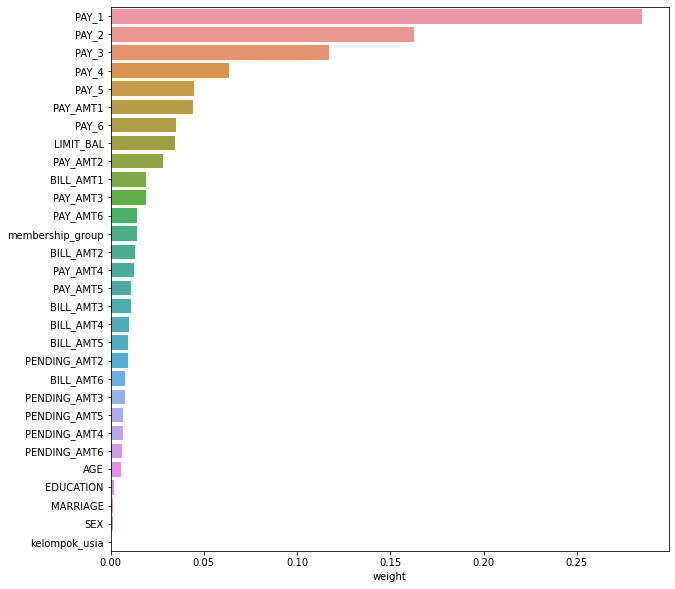

In [ ]:
importance_features = pd.DataFrame(rf_model_RS.best_estimator_.feature_importances_ , index=xtrain.columns, columns=['weight']).sort_values(by=['weight'], ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y=importance_features.index, x=importance_features['weight'])
plt.show()

In [ ]:
importance_features

,weight
PAY_1,0.285061
PAY_2,0.162634
PAY_3,0.116988
PAY_4,0.063318
PAY_5,0.044801
PAY_AMT1,0.043970
PAY_6,0.034956
LIMIT_BAL,0.034343
PAY_AMT2,0.027994
BILL_AMT1,0.018866


# **XGBOOST**

In [ ]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(xtrain, ytrain.values.ravel())
eval_classification(xg, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.65
Recall (Test Set): 0.36
F1-Score (Test Set): 0.46
AUC (test-proba): 0.78
AUC (train-proba): 0.82
tp : 508
fp  : 273
fn  : 900
tn  : 4619



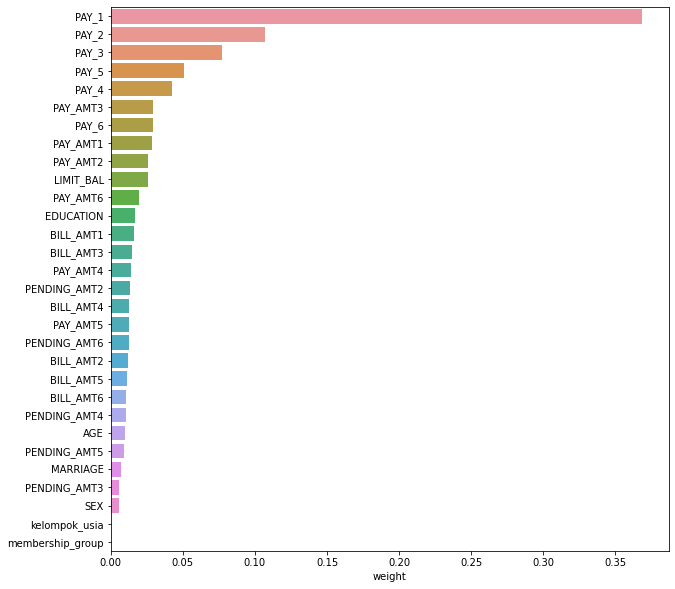

In [ ]:
importance_features = pd.DataFrame(xg.feature_importances_ , index=xtrain.columns, columns=['weight']).sort_values(by=['weight'], ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y=importance_features.index, x=importance_features['weight'])
plt.show()

**Tuning Hyper-Parameter**

In [ ]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, scoring = scoring, n_jobs=-1, random_state=111)
xg_tuned.fit(xtrain,ytrain.values.ravel())
eval_classification(xg_tuned, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.65
Recall (Test Set): 0.36
F1-Score (Test Set): 0.46
AUC (test-proba): 0.77
AUC (train-proba): 0.91
tp : 507
fp  : 279
fn  : 901
tn  : 4613



# **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(xtrain,ytrain.values.ravel())
eval_classification(ab, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.67
Recall (Test Set): 0.32
F1-Score (Test Set): 0.44
AUC (test-proba): 0.78
AUC (train-proba): 0.79
tp : 454
fp  : 225
fn  : 954
tn  : 4667



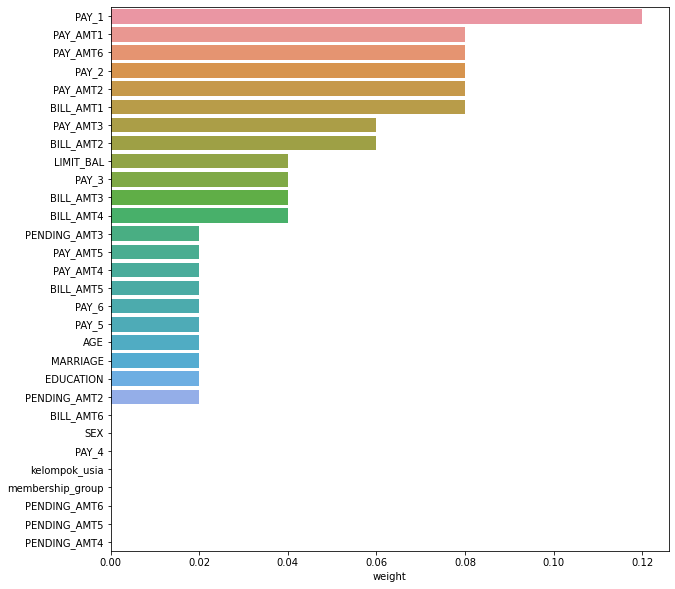

In [ ]:
importance_features = pd.DataFrame(ab.feature_importances_ , index=xtrain.columns, columns=['weight']).sort_values(by=['weight'], ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y=importance_features.index, x=importance_features['weight'])
plt.show()

In [ ]:
# hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
#                        learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
#                        algorithm = ['SAMME', 'SAMME.R']
#                       )
# ab = AdaBoostClassifier(random_state=42)
# ab_tuned = RandomizedSearchCV(ab, hyperparameters, cv=5, scoring = scoring, n_jobs=-1, random_state=111)
# ab_tuned.fit(xtrain,ytrain.values.ravel())
# eval_classification(ab_tuned, xtrain, ytrain, xtest, ytest)

# **Kesimpulan Stage Modeling**

> **Model Random Forest memiliki performa yang paling baik dari pada model yang lainnya dengan mempertimbangkan metric Precision, Recall**

# **Apply the model to predicting Customers who default next month**

In [ ]:
best_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_AMT1', 'PAY_6', 'LIMIT_BAL', 'PAY_AMT2', 'BILL_AMT1', 'PAY_AMT3']
X_train_final, X_test_final = xtrain[best_features].copy(), xtest[best_features].copy()
rf = RandomForestClassifier(**rf_best_hyperparams)
rf_model = rf.fit(X_train_final, ytrain.values.ravel())
ypredict = rf_model.predict(X_test_final)
eval_classification(rf_model, X_train_final, ytrain, X_test_final, ytest)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.66
Recall (Test Set): 0.37
F1-Score (Test Set): 0.47
AUC (test-proba): 0.78
AUC (train-proba): 0.81
tp : 514
fp  : 267
fn  : 894
tn  : 4625



## **Adjust PAY_STATUS**

In [ ]:
adjusted_X_test = X_test_final.copy()
adjusted_X_test.index = [ i for i in range(len(ypredict))]

adjusted_actual_y = ytest.copy()
adjusted_actual_y.index = [ i for i in range(len(ypredict))]

actual_y = ytest.copy()
actual_y.index = [ i for i in range(len(ypredict))]

**pada Customer yang terprediksi Default dan telah mendapatkan Treatment Status Pembayaran terakhirnya (PAY_1) diubah menjadi 0  karena diasumsikan semua Customer yang telah diberikan Treatment menjadi tidak default**

In [ ]:
def adjusting_X(temp, y_predict):
  for i in range(len(temp)):
    if (y_predict[i] == 1) and (temp.loc[i, ['PAY_1']].values >= 1):
      temp.loc[i, ['PAY_1']] = -2
    elif (y_predict[i] == 1):
      temp.loc[i, ['PAY_1']] = temp.loc[i, ['PAY_1']] - 1
      
adjusting_X(adjusted_X_test, y_predict)

**pada Customer yang terprediksi Default dan telah mendapatkan Treatment Target Labelnya (y) diubah menjadi 0  karena diasumsikan semua Customer yang telah diberikan Treatment menjadi tidak default**

In [ ]:
def adjusting_y(y_actual, y_predict):
  for i in range(len(y_actual)):
    if (y_predict[i] == 1):
      y_actual.loc[i, ['default_payment_next_month']] = 0

adjusting_y(adjusted_actual_y, ypredict)

# **Default Rate Sebelum dan Setelah Treatment**

In [ ]:
print('Before : {}\nAfter  : {}'.format(actual_y.mean()[0]*100, adjusted_actual_y.mean()[0]*100))

Before : 22.349206349206348
After  : 14.19047619047619


In [ ]:
before = round(actual_y.value_counts(normalize=True)*100,2)
after = round(adjusted_actual_y.value_counts(normalize=True)*100,2)
defaultrate = pd.DataFrame({ 'BeforeAfter' : ['Before','Before', 'After', 'After'], 'Default' : ['Non Default', 'Default', 'Non Default', 'Default'], 'Percentage' : [before[0], before[1], after[0], after[1]]})
# defaultrate['default'].apply(lambda x: 'Yes' if x==1 else 'No')
defaultrate


,BeforeAfter,Default,Percentage
0,Before,Non Default,77.65
1,Before,Default,22.35
2,After,Non Default,85.81
3,After,Default,14.19


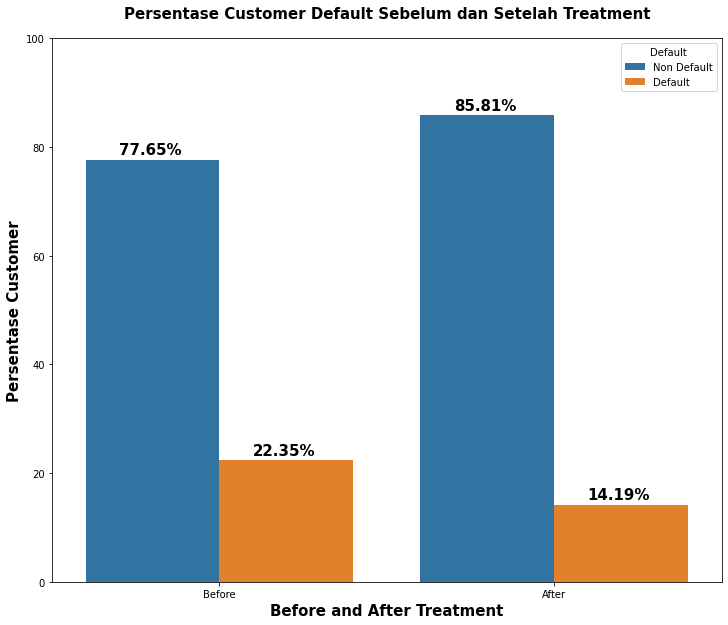

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x='BeforeAfter', y='Percentage', hue='Default',data=defaultrate)
for i in range(2):
  plt.text(x=-0.30+i, y=1+defaultrate[(defaultrate.Default=='Non Default')].Percentage.iloc[i], s=str(defaultrate[(defaultrate.Default=='Non Default')].Percentage.iloc[i])+'%', fontsize=15, fontweight='semibold')
for i in range(2):
  plt.text(x=0.10+i, y=1+defaultrate[(defaultrate.Default=='Default')].Percentage.iloc[i], s=str(defaultrate[(defaultrate.Default=='Default')].Percentage.iloc[i])+'%', fontsize=15, fontweight='semibold')
plt.title('Persentase Customer Default Sebelum dan Setelah Treatment', fontsize=15, pad=20, fontweight='semibold')
plt.ylim(0,100)
plt.xlabel('Before and After Treatment', fontsize=15, fontweight='semibold')
plt.ylabel('Persentase Customer', fontsize=15, fontweight='semibold')
plt.show()

### **Tanpa Adjust**

In [ ]:
eval_simulated_data(rf_model, X_test_final, ytest)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.66
Recall (Test Set): 0.37
F1-Score (Test Set): 0.47
AUC (test-proba): 0.78

tp : 514
fp  : 267
fn  : 894
tn  : 4625


**Adjust Threshold**

In [ ]:
eval_simulated_data(rf_model, X_test_final, ytest, threshold=0.7)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.79
Recall (Test Set): 0.08
F1-Score (Test Set): 0.15
AUC (test-proba): 0.78

tp : 116
fp  : 31
fn  : 1292
tn  : 4861


### **Adjusted X_test**

In [ ]:
eval_simulated_data(rf_model, adjusted_X_test, actual_y)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.65
Recall (Test Set): 0.19
F1-Score (Test Set): 0.29
AUC (test-proba): 0.76

tp : 261
fp  : 143
fn  : 1147
tn  : 4749


**Adjust Threshold**

In [ ]:
eval_simulated_data(rf_model, adjusted_X_test, actual_y, threshold=0.55)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.62
Recall (Test Set): 0.08
F1-Score (Test Set): 0.14
AUC (test-proba): 0.76

tp : 107
fp  : 66
fn  : 1301
tn  : 4826


### **Adjust X_test, Adjust actual_y**

In [ ]:
eval_simulated_data(rf_model, adjusted_X_test, adjusted_actual_y)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC (test-proba): 0.62

tp : 0
fp  : 404
fn  : 894
tn  : 5002


**Adjust Threshold**

In [ ]:
eval_simulated_data(rf_model, adjusted_X_test, adjusted_actual_y, threshold=0.6)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC (test-proba): 0.62

tp : 0
fp  : 3
fn  : 894
tn  : 5403
